In [1]:
try:
    import KustoPandas
except:
    import sys, os
    sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(""), '..')))
    import KustoPandas
from KustoPandas import Wrap

In [2]:
import pandas as pd
%matplotlib inline
import urllib.request


In [3]:
def dowload_dataset_if_necessary(url, filename):
    if not os.path.exists(filename):
        urllib.request.urlretrieve (url, filename)
url = "https://projects.fivethirtyeight.com/trump-approval-data/approval_polllist.csv"
filename = "approval_polllist.csv"
dowload_dataset_if_necessary(url, filename)
data = pd.read_csv(filename)
data.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,7/23/2020,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.262323,...,45.0,45.762709,43.573362,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,17:15:30 23 Jul 2020
1,Donald Trump,All polls,7/23/2020,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.680029,...,37.0,45.140403,37.897139,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,17:15:30 23 Jul 2020
2,Donald Trump,All polls,7/23/2020,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.242845,...,46.0,45.762709,44.573362,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,17:15:30 23 Jul 2020
3,Donald Trump,All polls,7/23/2020,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.153481,...,45.2,43.139738,43.865897,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,17:15:30 23 Jul 2020
4,Donald Trump,All polls,7/23/2020,1/22/2017,1/24/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.200411,...,43.0,51.572471,44.385622,NaN,T,http://www.rasmussenreports.com/public_content...,49266,77278,1/25/2017,17:15:30 23 Jul 2020


In [4]:
data.columns

Index(['president', 'subgroup', 'modeldate', 'startdate', 'enddate',
       'pollster', 'grade', 'samplesize', 'population', 'weight', 'influence',
       'approve', 'disapprove', 'adjusted_approve', 'adjusted_disapprove',
       'multiversions', 'tracking', 'url', 'poll_id', 'question_id',
       'createddate', 'timestamp'],
      dtype='object')

In [5]:
w = Wrap(data)
w.take(5)

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,7/23/2020,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.262323,...,45.0,45.762709,43.573362,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,17:15:30 23 Jul 2020
1,Donald Trump,All polls,7/23/2020,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.680029,...,37.0,45.140403,37.897139,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,17:15:30 23 Jul 2020
2,Donald Trump,All polls,7/23/2020,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.242845,...,46.0,45.762709,44.573362,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,17:15:30 23 Jul 2020
3,Donald Trump,All polls,7/23/2020,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.153481,...,45.2,43.139738,43.865897,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,17:15:30 23 Jul 2020
4,Donald Trump,All polls,7/23/2020,1/22/2017,1/24/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.200411,...,43.0,51.572471,44.385622,NaN,T,http://www.rasmussenreports.com/public_content...,49266,77278,1/25/2017,17:15:30 23 Jul 2020


In [6]:
w.summarize("count() by president")

,president,count_
0,Donald Trump,14151


In [7]:
w.summarize("count() by pollster, grade").top(10, "count_")

,pollster,grade,count_
58,YouGov,B,4308
24,Ipsos,B-,2626
41,Rasmussen Reports/Pulse Opinion Research,C+,1772
31,Morning Consult,B/C,1082
21,HarrisX,C,868
16,Gallup,B,840
48,SurveyMonkey,D-,454
39,Quinnipiac University,B+,128
27,Marist College,A+,120
1,American Research Group,B,109


In [8]:
w = w.project_rename("enddate = datetime(enddate)")

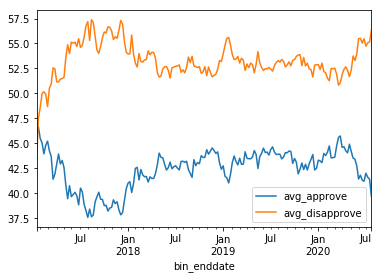

In [9]:
(w.summarize("avg(approve), avg(disapprove) by bin(enddate, 7d)")
.render("timechart"))

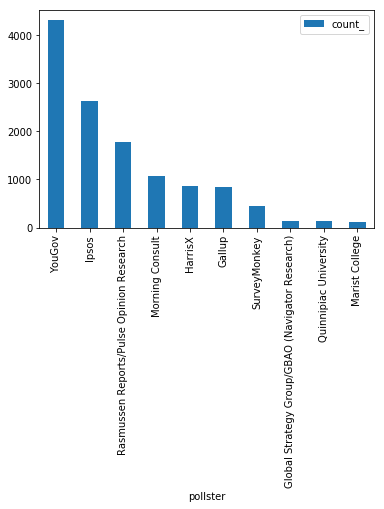

In [10]:
(w.summarize("count() by pollster")
 .top(10, "count_")
 .render("barchart"))

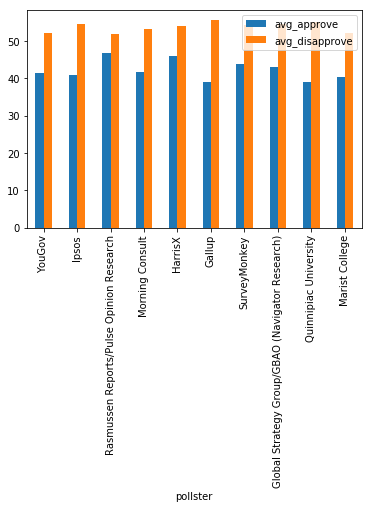

In [11]:
(w
 .summarize("num_polls= count(), avg(approve), avg(disapprove) by pollster")
 .top(10, "num_polls")
 .project_away("num_polls")
 .render("barchart"))